In [171]:
!pip install yfinance
!pip install keras-tuner --upgrade
!pip install finta
!pip install pyyaml h5py

In [174]:
# Import Libraries and dependencies
import os
from google.colab import drive
drive.mount('/content/gdrive')
import pandas as pd
import numpy as np
from pandas.tseries.offsets import DateOffset
import yfinance as yf
import keras_tuner as kt
from finta import TA
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import classification_report
from imblearn.over_sampling import RandomOverSampler
%matplotlib inline

Mounted at /content/gdrive


In [101]:
#Get Nasdaq 100(^NDX) for 1d from yahoo finance for MAX period.
df = yf.download(tickers='^NDX', period='MAX', interval='1d')
display(df)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1985-10-01,110.620003,112.160004,110.565002,112.139999,112.139999,153160000
1985-10-02,112.139999,112.540001,110.779999,110.824997,110.824997,164640000
1985-10-03,110.839996,111.184998,110.120003,110.870003,110.870003,147300000
1985-10-04,110.870003,110.870003,109.855003,110.074997,110.074997,147900000
1985-10-07,110.074997,110.135002,108.175003,108.199997,108.199997,128640000
...,...,...,...,...,...,...
2022-01-14,15396.469727,15617.179688,15396.469727,15611.589844,15611.589844,4345780000
2022-01-18,15378.059570,15446.299805,15182.959961,15210.759766,15210.759766,5027990000
2022-01-19,15287.250000,15382.000000,15038.440430,15047.839844,15047.839844,4639990000


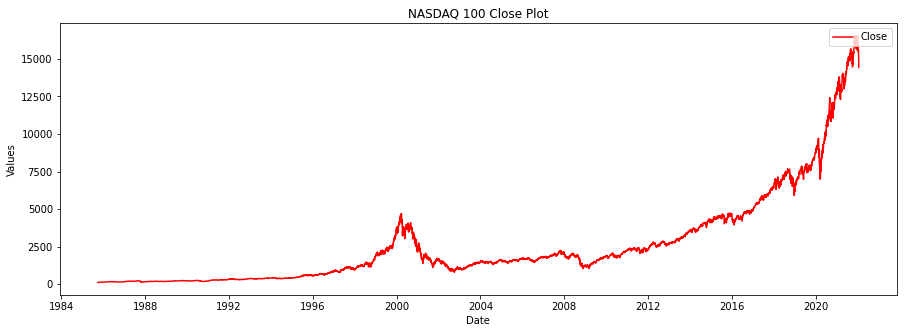

In [102]:
# Visualize Close data for nasdaq100_df
plt.figure(figsize=(15, 5))
plt.plot(df['Close'], color='r', label='Close', alpha=1)
plt.xlabel("Date")
plt.ylabel("Values")
plt.title("NASDAQ 100 Close Plot")
plt.legend(loc='upper right')
plt.show()

In [103]:
smas_df = pd.DataFrame({'SMA_Short': TA.SMA(df, period=20)})
smas_df

,SMA_Short
Date,
1985-10-01,NaN
1985-10-02,NaN
1985-10-03,NaN
1985-10-04,NaN
1985-10-07,NaN
...,...
2022-01-14,16029.088477
2022-01-18,15999.553467
2022-01-19,15970.563477


In [104]:
# Set period to be used for trading indicators
period = 20

# Use BBANDS and MFI from TA to get trading indicators for nasdaq100_df
bbands_df = TA.BBANDS(df, period=period)
mfi_df = pd.DataFrame({'MFI':TA.MFI(df, period=period)})
macd_df = TA.MACD(df)

display(bbands_df)
display(mfi_df)
display(macd_df)

,BB_UPPER,BB_MIDDLE,BB_LOWER
Date,,,
1985-10-01,NaN,NaN,NaN
1985-10-02,NaN,NaN,NaN
1985-10-03,NaN,NaN,NaN
1985-10-04,NaN,NaN,NaN
1985-10-07,NaN,NaN,NaN
...,...,...,...
2022-01-14,16764.364131,16029.088477,15293.812822
2022-01-18,16816.272792,15999.553467,15182.834141
2022-01-19,16878.890477,15970.563477,15062.236476


,MFI
Date,
1985-10-01,NaN
1985-10-02,NaN
1985-10-03,NaN
1985-10-04,NaN
1985-10-07,NaN
...,...
2022-01-14,37.447075
2022-01-18,38.629205
2022-01-19,38.659218


,MACD,SIGNAL
Date,,
1985-10-01,0.000000,0.000000
1985-10-02,-0.029503,-0.016391
1985-10-03,-0.036197,-0.024508
1985-10-04,-0.067058,-0.038922
1985-10-07,-0.157026,-0.074056
...,...,...
2022-01-14,-123.454815,-52.747067
2022-01-18,-165.179304,-75.233514
2022-01-19,-208.983507,-101.983513


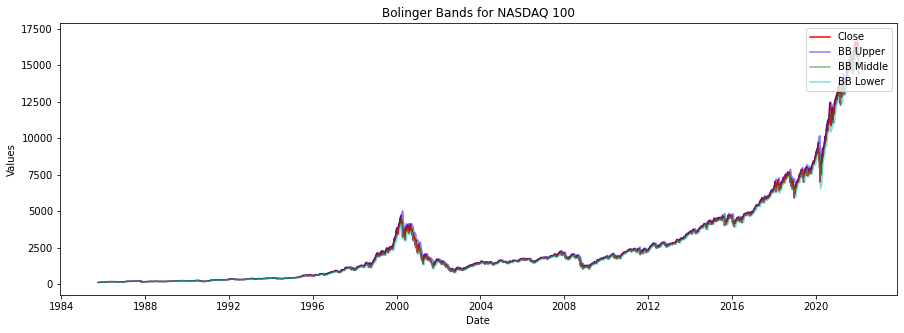

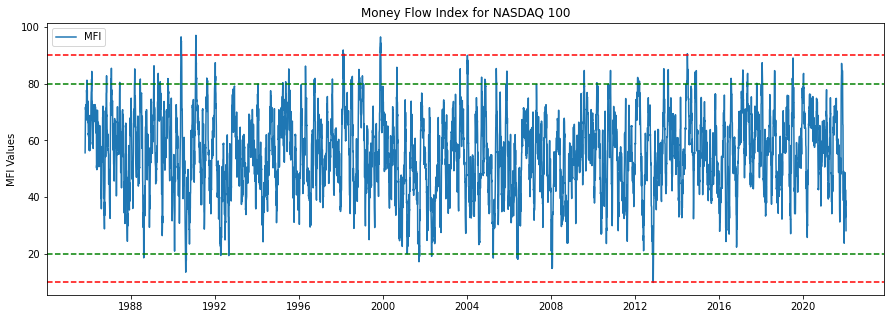

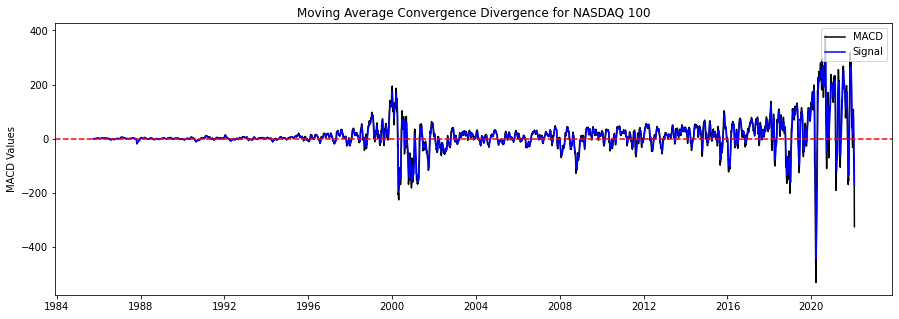

In [105]:
#Visualize data for bbands_df, mfi_df, and macd_df
#BBANDS plot
plt.figure(figsize=(15, 5))
plt.plot(df['Close'], color='r', label='Close', alpha=1)
plt.plot(bbands_df['BB_UPPER'], color='b', label='BB Upper', alpha=0.5)
plt.plot(bbands_df['BB_MIDDLE'], color='g', label='BB Middle', alpha=0.5)
plt.plot(bbands_df['BB_LOWER'], color='c', label='BB Lower', alpha=0.5)
plt.xlabel("Date")
plt.ylabel("Values")
plt.title("Bolinger Bands for NASDAQ 100")
plt.legend(loc='upper right')
plt.show()

# MFI plot 
plt.figure(figsize=(15, 5))
plt.plot(mfi_df['MFI'], label = 'MFI')
plt.axhline(10, linestyle = '--', color = 'red')
plt.axhline(20, linestyle = '--', color = 'green')
plt.axhline(80, linestyle = '--', color = 'green')
plt.axhline(90, linestyle = '--', color = 'red')
plt.title('Money Flow Index for NASDAQ 100')
plt.ylabel('MFI Values')
plt.legend(loc='upper left')
plt.show()

#MACD plot
plt.figure(figsize=(15, 5))
plt.plot(macd_df['MACD'], color='black', label = 'MACD')
plt.plot(macd_df['SIGNAL'], color='blue', label = 'Signal')
plt.axhline(0, linestyle = '--', color = 'red')
plt.title('Moving Average Convergence Divergence for NASDAQ 100')
plt.ylabel('MACD Values')
plt.legend(loc='upper right')
plt.show()

In [106]:
# Create a copy of nasdaq100_df and concatenate with bbands_df and mfi_df
trading_signals_df = df.copy()
trading_signals_df = pd.concat([trading_signals_df, bbands_df, mfi_df, macd_df], axis=1)
display(trading_signals_df)

,Open,High,Low,Close,Adj Close,Volume,BB_UPPER,BB_MIDDLE,BB_LOWER,MFI,MACD,SIGNAL
Date,,,,,,,,,,,,
1985-10-01,110.620003,112.160004,110.565002,112.139999,112.139999,153160000,NaN,NaN,NaN,NaN,0.000000,0.000000
1985-10-02,112.139999,112.540001,110.779999,110.824997,110.824997,164640000,NaN,NaN,NaN,NaN,-0.029503,-0.016391
1985-10-03,110.839996,111.184998,110.120003,110.870003,110.870003,147300000,NaN,NaN,NaN,NaN,-0.036197,-0.024508
1985-10-04,110.870003,110.870003,109.855003,110.074997,110.074997,147900000,NaN,NaN,NaN,NaN,-0.067058,-0.038922
1985-10-07,110.074997,110.135002,108.175003,108.199997,108.199997,128640000,NaN,NaN,NaN,NaN,-0.157026,-0.074056
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-14,15396.469727,15617.179688,15396.469727,15611.589844,15611.589844,4345780000,16764.364131,16029.088477,15293.812822,37.447075,-123.454815,-52.747067
2022-01-18,15378.059570,15446.299805,15182.959961,15210.759766,15210.759766,5027990000,16816.272792,15999.553467,15182.834141,38.629205,-165.179304,-75.233514
2022-01-19,15287.250000,15382.000000,15038.440430,15047.839844,15047.839844,4639990000,16878.890477,15970.563477,15062.236476,38.659218,-208.983507,-101.983513


In [107]:
# Create a trading algorithm using Bollinger Bands
# Set the Signal column
trading_signals_df["Signal_BB"] = 0.0

# Create a value to hold the initial trade signal
trade_signal = 0

# Generate the trading signals 1 (entry) or -1 (exit) for a long position trading algorithm
# where 1 is when the Close price is less than the BB_LOWER window
# where -1 is when the Close price is greater the the BB_UPPER window
# trading signal adds one for each buy and doesnt buy more until a sell which resets the trade signal back to 0 and vice verca
for index, row in trading_signals_df.iterrows():
    if (row["Close"] < row["BB_LOWER"]) and (trade_signal < 1):
        trading_signals_df.loc[index, "Signal_BB"] = 1.0
        trade_signal += 1
    elif (row["Close"] > row["BB_UPPER"]) and (trade_signal > 0):
        trading_signals_df.loc[index,"Signal_BB"] = -1.0
        trade_signal = 0

trading_signals_df['Signal_BB'].value_counts()

 0.0    8976
 1.0      89
-1.0      88
Name: Signal_BB, dtype: int64

In [108]:
# Create a trading algorithm using Money Flow Index
# Set Signal column
trading_signals_df['Signal_MFI'] = 0.0

# Create a value to hold the initial trade signal
trade_signal = 0

# Generate the trading signals 1 (entry) or -1 (exit) for a long position trading algorithm
# where 1 is when the MFI is less than the 20 (Oversold)
# where -1 is when the MFI is greater than 80 (Overbought)
# trading signal adds one for each buy and doesnt buy more until a sell which resets the trade signal back to 0 and vice versa
for index, row in trading_signals_df.iterrows():
    if (row['MFI'] > 80) and (trade_signal > 0):
        trading_signals_df.loc[index, 'Signal_MFI'] = -1
        trade_signal = 0
    elif (row['MFI'] < 20) and (trade_signal < 1):
        trading_signals_df.loc[index, 'Signal_MFI'] = 1
        trade_signal += 1
        
trading_signals_df['Signal_MFI'].value_counts()

 0.0    9139
-1.0       7
 1.0       7
Name: Signal_MFI, dtype: int64

In [109]:
# Create a trading algorithm using Money Flow Index
# Set Signal column
trading_signals_df['Signal_MACD'] = 0.0

# Create a value to hold the initial trade signal
trade_signal = 0

# Generate the trading signals 1 (entry) or -1 (exit) for a long position trading algorithm
# where -1 is when the MACD moves below 0 (Bearish)
# where 1 is when the MACD moves above 0 (Bullish)
# trading signal adds one for each buy and doesnt buy more until a sell which resets the trade signal back to 0 and vice versa
for index, row in trading_signals_df.iterrows():
    if (row['MACD'] < row['SIGNAL']) and (trade_signal > 0):
        trading_signals_df.loc[index, 'Signal_MACD'] = -1
        trade_signal = 0
    elif (row['MACD'] > row['SIGNAL']) and (trade_signal < 1):
        trading_signals_df.loc[index, 'Signal_MACD'] = 1
        trade_signal += 1
        
trading_signals_df['Signal_MACD'].value_counts()

 0.0    8415
-1.0     369
 1.0     369
Name: Signal_MACD, dtype: int64

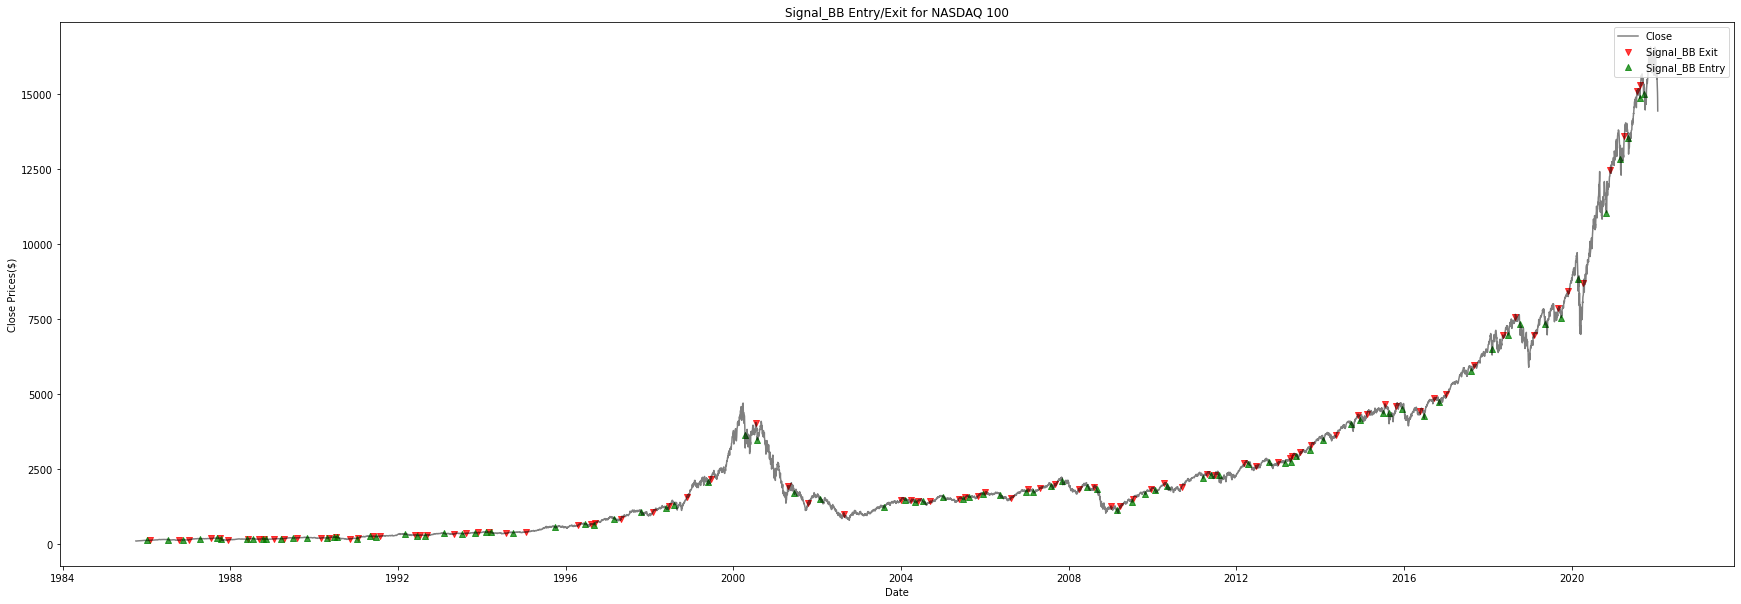

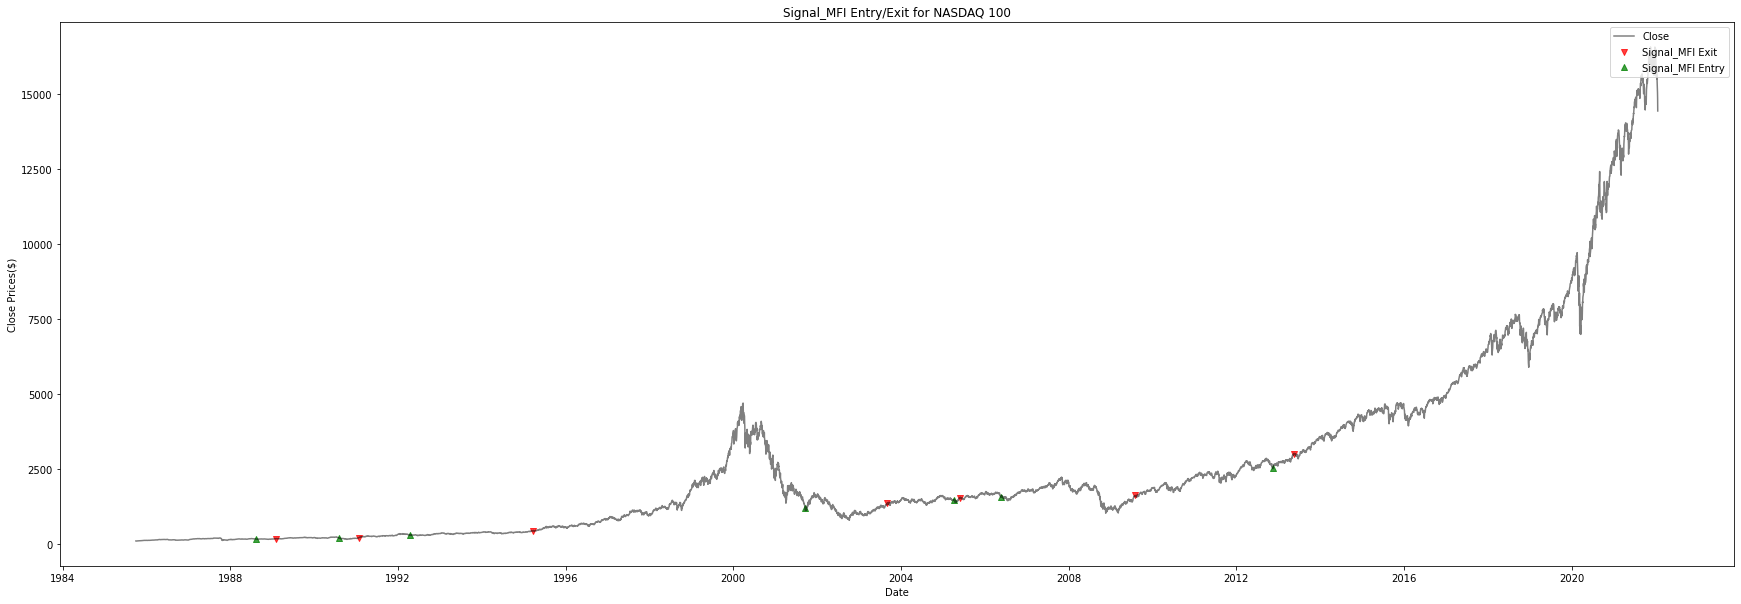

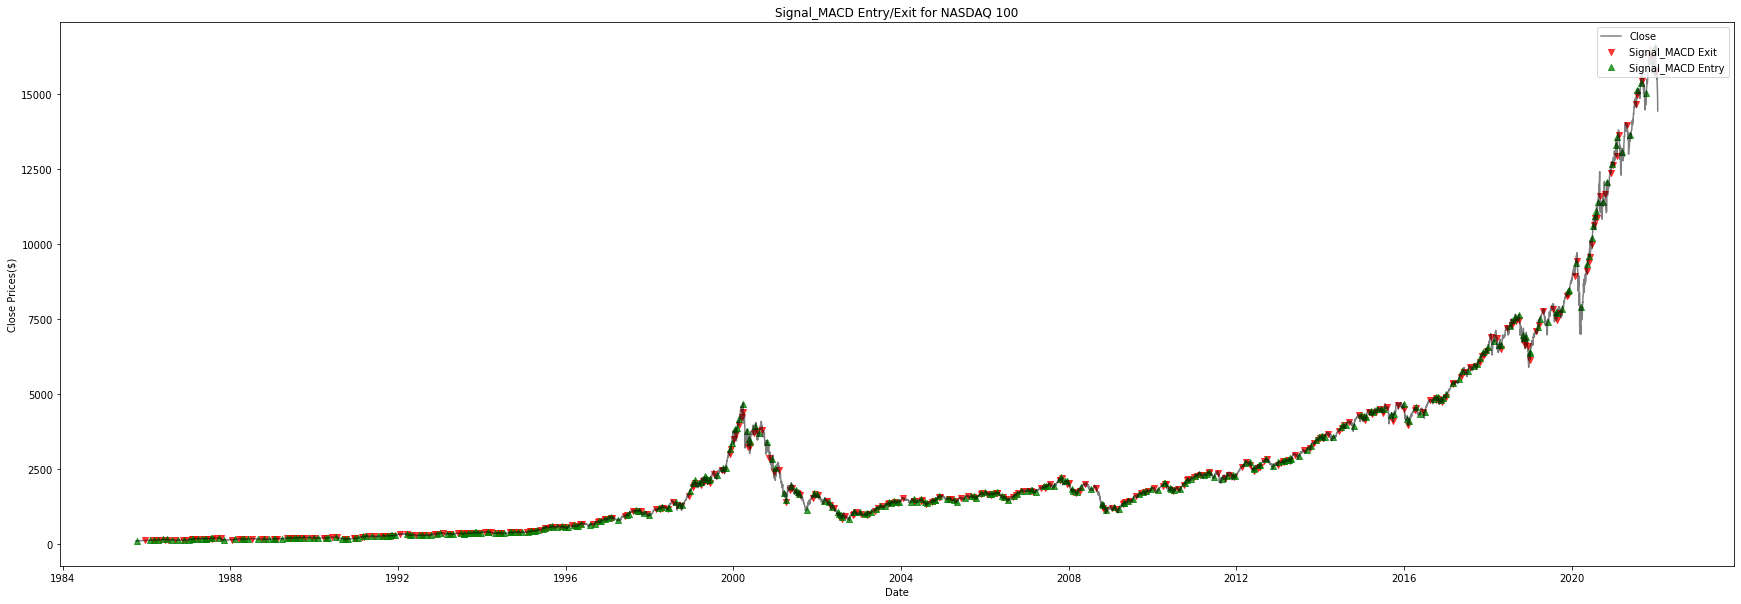

In [110]:
# Set up function to overlay entry and exit signals based on specified column and df on the Close Plot
def plot_signals(df, signal):
    plt.figure(figsize=(30, 10))
    plt.plot(df['Close'], c='black', label='Close', alpha=0.5)
    plt.scatter(df.index[df[signal]==-1.0], df[df[signal]==-1.0]['Close'], c='red', label=f'{signal} Exit', marker='v', alpha=0.75)
    plt.scatter(df.index[df[signal]==1.0], df[df[signal]==1.0]['Close'], c='green', label= f'{signal} Entry', marker='^', alpha=0.75)
    plt.xlabel("Date")
    plt.ylabel("Close Prices($)")
    plt.title(f'{signal} Entry/Exit for NASDAQ 100')
    plt.legend(loc='upper right')
    plt.show()

# Display Entry/Exit signals for BB, MFI, and MACD
plot_signals(trading_signals_df, 'Signal_BB')
plot_signals(trading_signals_df, 'Signal_MFI')
plot_signals(trading_signals_df, 'Signal_MACD')

In [111]:
# Set trading signals by using daily returns
trading_signals_df['Actual_Returns'] = trading_signals_df['Adj Close'].pct_change()
trading_signals_df = trading_signals_df.dropna()
# Initialize the new Signal column
trading_signals_df['Signal_RTN'] = 0.0
trading_signals_df['Buy'] = 0.0
trading_signals_df['Sell'] = 0.0

# Generate Signal to buy stock[1] in Buy column
trading_signals_df.loc[(trading_signals_df['Actual_Returns'] > 0), 'Buy'] = 1
trading_signals_df.loc[(trading_signals_df['Actual_Returns'] > 0), 'Signal_RTN'] = 1

# Generate Signal to sell stock[1] in Sell column
trading_signals_df.loc[(trading_signals_df['Actual_Returns'] < 0), 'Sell'] = 1
trading_signals_df.loc[(trading_signals_df['Actual_Returns'] < 0), 'Signal_RTN'] = -1


display(trading_signals_df['Signal_RTN'].value_counts())
trading_signals_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

 1.0    5012
-1.0    4114
 0.0       8
Name: Signal_RTN, dtype: int64

,Open,High,Low,Close,Adj Close,Volume,BB_UPPER,BB_MIDDLE,BB_LOWER,MFI,MACD,SIGNAL,Signal_BB,Signal_MFI,Signal_MACD,Actual_Returns,Signal_RTN,Buy,Sell
Date,,,,,,,,,,,,,,,,,,,
1985-10-28,113.910004,113.910004,113.205002,113.820000,113.820000,131460000,117.279318,112.23625,107.193182,55.636656,0.682533,0.607220,0.0,0.0,0.0,-0.000790,-1.0,0.0,1.0
1985-10-29,113.820000,115.735001,113.805000,115.400002,115.400002,163400000,117.636228,112.39925,107.162272,57.952953,0.731486,0.632304,0.0,0.0,0.0,0.013882,1.0,1.0,0.0
1985-10-30,115.400002,116.125000,115.339996,115.769997,115.769997,196040000,118.035265,112.64650,107.257735,63.490767,0.785488,0.663169,0.0,0.0,0.0,0.003206,1.0,1.0,0.0
1985-10-31,115.769997,116.110001,115.154999,115.480003,115.480003,169920000,118.339686,112.87700,107.414315,62.915519,0.798355,0.690367,0.0,0.0,0.0,-0.002505,-1.0,0.0,1.0
1985-11-01,115.480003,116.775002,115.480003,116.275002,116.275002,180180000,118.683748,113.18700,107.690253,67.758641,0.853579,0.723164,0.0,0.0,0.0,0.006884,1.0,1.0,0.0


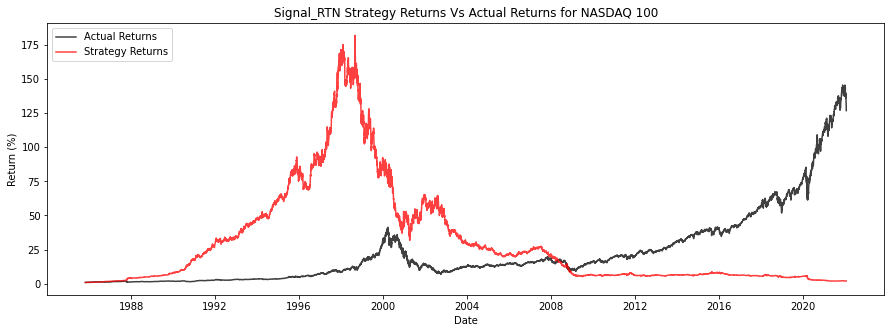

In [112]:
# Find the Strategy Returns for the trading strategy. and visualize comparision of actual vs strategy
def compare_returns(df, signal):
    df['Strategy_Returns'] = df['Actual_Returns'] * df[signal].shift()
    plt.figure(figsize=(15, 5))
    plt.plot(((1 + df['Actual_Returns']).cumprod()), c='black', label='Actual Returns', alpha=0.75)
    plt.plot(((1 + df['Strategy_Returns']).cumprod()), c='red', label='Strategy Returns', alpha=0.75)
    plt.xlabel("Date")
    plt.ylabel("Return (%)")
    plt.title(f'{signal} Strategy Returns Vs Actual Returns for NASDAQ 100')
    plt.legend(loc='upper left')
    plt.show()

compare_returns(trading_signals_df, 'Signal_RTN')

In [113]:
# Set X and y input for NN
X_ts = trading_signals_df[['BB_UPPER', 'BB_MIDDLE', 'BB_LOWER', 'MFI', 'MACD', 'SIGNAL']].shift().dropna().copy()
X_c = trading_signals_df[['Adj Close']].dropna().copy()
y_bs = trading_signals_df[['Buy', 'Sell']]
y_RTN = trading_signals_df['Signal_RTN']

display(X_ts.head())
display(X_c.head())
display(y_bs.head())
display(y_RTN.head())

,BB_UPPER,BB_MIDDLE,BB_LOWER,MFI,MACD,SIGNAL
Date,,,,,,
1985-10-29,117.279318,112.23625,107.193182,55.636656,0.682533,0.607220
1985-10-30,117.636228,112.39925,107.162272,57.952953,0.731486,0.632304
1985-10-31,118.035265,112.64650,107.257735,63.490767,0.785488,0.663169
1985-11-01,118.339686,112.87700,107.414315,62.915519,0.798355,0.690367
1985-11-04,118.683748,113.18700,107.690253,67.758641,0.853579,0.723164


,Adj Close
Date,
1985-10-28,113.820000
1985-10-29,115.400002
1985-10-30,115.769997
1985-10-31,115.480003
1985-11-01,116.275002


,Buy,Sell
Date,,
1985-10-28,0.0,1.0
1985-10-29,1.0,0.0
1985-10-30,1.0,0.0
1985-10-31,0.0,1.0
1985-11-01,1.0,0.0


Date
1985-10-28   -1.0
1985-10-29    1.0
1985-10-30    1.0
1985-10-31   -1.0
1985-11-01    1.0
Name: Signal_RTN, dtype: float64

In [142]:
# Set training start and end dates using DateOffset
# Set offset in days to offset data 60s*60m*24h then multiply by the percentage of data to use
offset = round(((int(round(X_ts.index.max().timestamp())) - int(round(X_ts.index.min().timestamp())))/86400)*.90)
training_begin = X_ts.index.min()
training_end = X_ts.index.min() + DateOffset(days= offset)
print(f'Training Start: {training_begin}, Training End: {training_end}')

Training Start: 1985-10-29 00:00:00, Training End: 2018-06-08 00:00:00


In [143]:
# Set X_train, y_train, X_test, y_test
x_ts_train = X_ts.loc[training_begin:training_end]
x_c_train = X_c.loc[training_begin:training_end]
y_bs_train = y_bs.loc[training_begin:training_end]
y_RTN_train = y_RTN.loc[training_begin:training_end]

x_ts_test = X_ts.loc[training_end:]
x_c_test = X_c.loc[training_end:]
y_bs_test = y_bs.loc[training_end:]
y_RTN_test = y_RTN.loc[training_end:]

In [144]:
# Scale X_training and X_testing sets using StandardScaler()/MinMaxScaler()
scaler = StandardScaler()#feature_range=(0,1))
xts_train_scaled = scaler.fit_transform(x_ts_train)
xts_test_scaled = scaler.transform(x_ts_test)

In [145]:
mmscaler = MinMaxScaler(feature_range=(-1,1))
xc_train_scaled = mmscaler.fit_transform(x_c_train)
xc_test_scaled = mmscaler.transform(x_c_test)


In [146]:
# Create data for using the last 60 signals worth of trading indicators to predict the signal for the next instance
batch = 64
xc_train_ar = []
yc_train_ar = []

for i in range(batch, len(xc_train_scaled)):
    xc_train_ar.append(xc_train_scaled[i-batch:i])
    yc_train_ar.append(xc_train_scaled[i])

# Create data array for testing data
xc_test_ar = []
yc_test_ar = xc_test_scaled[batch:]

for i in range(batch, len(xc_test_scaled)):
    xc_test_ar.append(xc_test_scaled[i-batch:i])

In [147]:
# Convert data to numpy arrays and then check shape for LSTM(3 dimensional)
xc_train_ar, yc_train_ar = np.array(xc_train_ar), np.array(yc_train_ar)
display(xc_train_ar.shape)

xc_test_ar, yc_test_ar = np.array(xc_test_ar), np.array(yc_test_ar)
display(xc_test_ar.shape)

(8157, 64, 1)

(849, 64, 1)

In [206]:
# Set up the Nueral Network model
nnlstm = Sequential()
nnlstm.add(
    LSTM(
        units= round(((xc_train_ar.shape[1] * xc_train_ar.shape[2])+yc_train_ar.shape[1])*.75),
        activation = 'tanh',
        return_sequences= True, 
        input_shape= (xc_train_ar.shape[1], xc_train_ar.shape[2])
    ))
nnlstm.add(
    Dropout(
        rate=0.2
    ))
nnlstm.add(
    LSTM(
        units= round(((xc_train_ar.shape[1] * xc_train_ar.shape[2])+yc_train_ar.shape[1])*.5), 
        activation = 'tanh', 
        return_sequences= False
    ))
nnlstm.add(
    Dropout(
        rate=0.4
        ))
nnlstm.add(Dense(
    units= round(((xc_train_ar.shape[1] * xc_train_ar.shape[2])+yc_train_ar.shape[1])*.25),
    activation= 'tanh'
    ))
nnlstm.add(Dense(
    units= yc_train_ar.shape[1],
    activation= 'sigmoid'
    ))
# Compile the Nueral Network model
nnlstm.compile(optimizer='adam', loss='mse', metrics=[tf.keras.metrics.RootMeanSquaredError(), tf.keras.metrics.MeanAbsoluteError()])

In [207]:
# Set up the Nueral Network model
nn = Sequential()
nn.add(Dense(
    units = round(xts_train_scaled.shape[1] + y_bs_train.shape[1]),
    activation='relu', 
    input_dim= xts_train_scaled.shape[1]
    ))
nn.add(Dense(
    units= round((xts_train_scaled.shape[1] + y_bs_train.shape[1])), 
    activation='relu'
    ))
nn.add(Dense(
    units= round((xts_train_scaled.shape[1] + y_bs_train.shape[1])), 
    activation='relu'
    ))
nn.add(Dense(
    units= y_bs_train.shape[1], 
    activation='sigmoid'
    ))
# Compile the Nueral Network model
nn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [245]:
# Fit the LSTM model with training data
nnlstm.fit(xc_train_ar, yc_train_ar, batch_size=1, epochs=5)

Epoch 1/5
8157/8157 [==============================] - 266s 33ms/step - loss: 0.4550 - root_mean_squared_error: 0.6745 - mean_absolute_error: 0.5886
Epoch 2/5
8157/8157 [==============================] - 268s 33ms/step - loss: 0.4550 - root_mean_squared_error: 0.6745 - mean_absolute_error: 0.5883
Epoch 3/5
8157/8157 [==============================] - 268s 33ms/step - loss: 0.4550 - root_mean_squared_error: 0.6746 - mean_absolute_error: 0.5888
Epoch 4/5
5158/8157 [=================>............] - ETA: 1:38 - loss: 0.4553 - root_mean_squared_error: 0.6747 - mean_absolute_error: 0.5885

KeyboardInterrupt: ignored

In [244]:
# Fit the Dense NN model with training data
nn.fit(xts_train_scaled, y_bs_train, epochs=100)

Epoch 1/100
257/257 [==============================] - 1s 2ms/step - loss: 0.6837 - accuracy: 0.5515
Epoch 2/100
257/257 [==============================] - 1s 2ms/step - loss: 0.6838 - accuracy: 0.5550
Epoch 3/100
257/257 [==============================] - 1s 2ms/step - loss: 0.6838 - accuracy: 0.5539
Epoch 4/100
257/257 [==============================] - 1s 2ms/step - loss: 0.6837 - accuracy: 0.5563
Epoch 5/100
257/257 [==============================] - 1s 2ms/step - loss: 0.6839 - accuracy: 0.5519
Epoch 6/100
257/257 [==============================] - 0s 2ms/step - loss: 0.6837 - accuracy: 0.5538
Epoch 7/100
257/257 [==============================] - 0s 2ms/step - loss: 0.6836 - accuracy: 0.5519
Epoch 8/100
257/257 [==============================] - 0s 2ms/step - loss: 0.6836 - accuracy: 0.5567
Epoch 9/100
257/257 [==============================] - 0s 2ms/step - loss: 0.6831 - accuracy: 0.5535
Epoch 10/100
257/257 [==============================] - 0s 2ms/step - loss: 0.6833 - accura

In [219]:
# Predict using the LSTM and Dense NN models using Testing data
pred_lstm = nnlstm.predict(xc_test_ar)
pred_nn = nn.predict(xts_test_scaled)


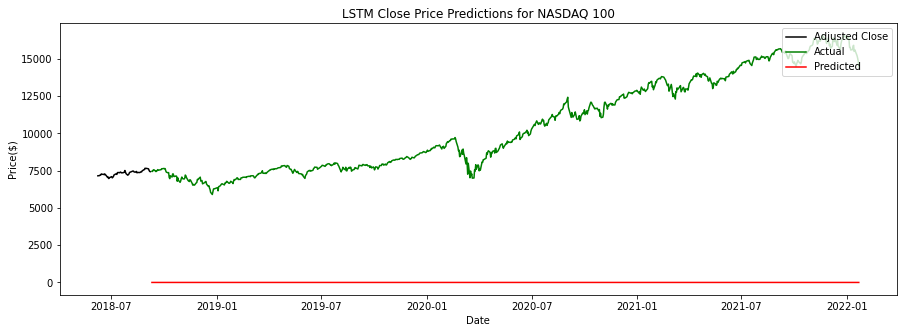

RMSE = 3368.978


,LSTM_Signal
Date,
2018-09-10,-1.0
2018-09-11,-1.0
2018-09-12,-1.0
2018-09-13,1.0
2018-09-14,1.0
...,...
2022-01-14,1.0
2022-01-18,0.0
2022-01-19,0.0


In [220]:
def lstm_pred_to_signal(lstm_pred, scaler, y_test, x_test, batch):
  unscaled_pred = scaler.inverse_transform(lstm_pred)
  actual_unscaled = scaler.inverse_transform(y_test)
  #Root Mean Squared Error How off the predicted is from the actual close
  rmse = np.sqrt(np.mean(unscaled_pred - actual_unscaled)**2)
  rmse

  #create Visualization for Adj Close Prediction
  train_df = x_test['Adj Close'][:batch]
  verify = x_test[['Adj Close']][batch:]
  verify['Predicted'] = pred_lstm
  # Visualize LSTM Model close price prediction
  plt.figure(figsize=(15,5))
  plt.plot(train_df, c='black', label='Adjusted Close')
  plt.plot(verify['Adj Close'], c='g', label='Actual')
  plt.plot(verify['Predicted'], c='r', label='Predicted')
  plt.xlabel(xlabel='Date')
  plt.ylabel(ylabel='Price($)')
  plt.title('LSTM Close Price Predictions for NASDAQ 100')
  plt.legend(loc='upper right')
  plt.show()
  
  pred_df = pd.DataFrame({'Predicted':pd.concat([train_df.iloc[[-1],], verify['Predicted']], axis=0)})
  pred_df['Pred_RTN'] = pred_df['Predicted'].pct_change()
  pred_df = pred_df.dropna()
  pred_df['LSTM_Signal'] = 0.0

  # Generate Signal to buy stock[1] in Buy column
  pred_df.loc[(pred_df['Pred_RTN'] > 0), 'LSTM_Signal'] = 1

  # Generate Signal to sell stock[1] in Sell column
  pred_df.loc[(pred_df['Pred_RTN'] < 0), 'LSTM_Signal'] = -1

  return rmse, pd.DataFrame(pred_df['LSTM_Signal'])

rmse , lstm_signal = lstm_pred_to_signal(pred_lstm, mmscaler, yc_test_ar, x_c_test, batch)

print(f'RMSE = {rmse:.3f}')
lstm_signal


In [238]:
# Create a function to convert probabilty into entry/exit signals if buy is greater than sell 1 (entry) if sell is greater than buy -1 (exit)
def prediction_convert(prediction):
  pred_interpreted = []
  for i in range(0, len(prediction)):
    if prediction[i][0] > prediction[i][1]:
      pred_interpreted.append(1)
    elif prediction[i][0] < prediction[i][1]:
      pred_interpreted.append(-1)
    else:
      pred_interpreted.append(0)
  return pred_interpreted


nn_signal = pd.DataFrame({'Actual': y_RTN_test, 'Dense_Signal':prediction_convert(pred_nn)})

# Concatenate Actual_Returns to pred_df
#pred_lstm_df = pd.concat([pred_lstm_df, trading_signals_df['Actual_Returns']], axis=1).dropna()
nn_df = pd.concat([nn_signal, trading_signals_df['Actual_Returns']], axis=1).dropna()

nn_df['Correct'] = nn_df['Dense_Signal'] == nn_df['Actual']
acc = nn_df['Correct'].sum()/nn_df['Correct'].size
print(f'Accuracy of Dense Model: {(acc*100):.3f}%')
nn_df

Accuracy of Dense Model: 50.383%


,Actual,Dense_Signal,Actual_Returns,Correct
Date,,,,
2018-06-08,-1.0,1.0,-0.000029,False
2018-06-11,1.0,-1.0,0.002217,False
2018-06-12,1.0,-1.0,0.005678,False
2018-06-13,-1.0,-1.0,-0.000544,True
2018-06-14,1.0,-1.0,0.010316,False
...,...,...,...,...
2022-01-14,1.0,1.0,0.007484,True
2022-01-18,-1.0,1.0,-0.025675,False
2022-01-19,-1.0,1.0,-0.010711,False


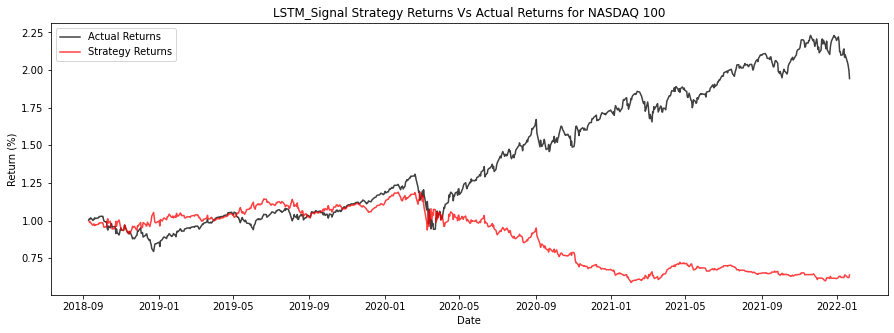

In [241]:
#Visualize LSTM Predicted Returns
lstm_df = pd.concat([trading_signals_df['Actual_Returns'], trading_signals_df['Signal_RTN'], lstm_signal], axis=1).dropna()
compare_returns(lstm_df, 'LSTM_Signal')

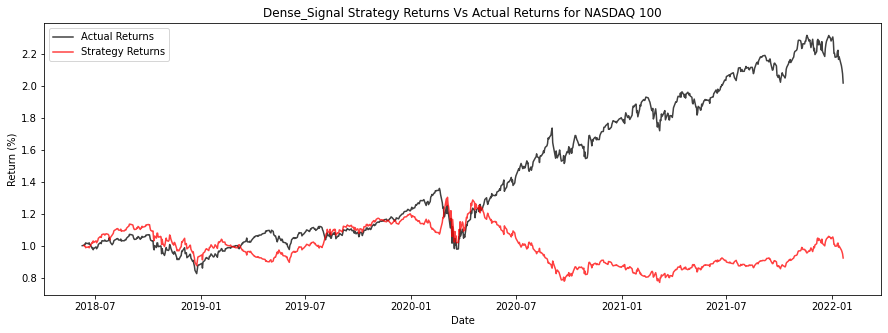

In [242]:
# Visualize Return using Predicted 
compare_returns(nn_df, 'Dense_Signal')

In [243]:
print('LSTM Classification Report')
print(classification_report(lstm_df['Signal_RTN'] ,lstm_df['LSTM_Signal']))
print('Dense Only NN Classification Report')
print(classification_report(nn_df['Actual'] ,nn_df['Dense_Signal']))

LSTM Classification Report
              precision    recall  f1-score   support

        -1.0       0.42      0.35      0.38       358
         0.0       0.00      0.00      0.00         0
         1.0       0.57      0.57      0.57       491

    accuracy                           0.48       849
   macro avg       0.33      0.31      0.32       849
weighted avg       0.51      0.48      0.49       849

Dense Only NN Classification Report
              precision    recall  f1-score   support

        -1.0       0.42      0.42      0.42       387
         1.0       0.57      0.56      0.57       526

    accuracy                           0.50       913
   macro avg       0.49      0.49      0.49       913
weighted avg       0.50      0.50      0.50       913



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [199]:

save_name = f'Dense_{acc:.5f}%.h5'
path = f"/content/gdrive/MyDrive/Colab_Notebooks/saved_models/{save_name}" 
nn.save(path)


In [200]:
save_name = f'LSTM_{rmse:.3f}.h5'
path = f"/content/gdrive/MyDrive/Colab_Notebooks/saved_models/{save_name}" 
nnlstm.save(path)

In [ ]:
def build_model(hp):
    model = Sequential()
    model.add(
        LSTM(
            units=240, 
             activation='tanh', 
             return_sequences=True, 
             input_shape=(X_train_ar.shape[1], X_train_ar.shape[2])
             )
        )
    model.add(
        LSTM(
            units=240, 
             activation='tanh', 
             return_sequences=False
             )
        )
    model.add(
        Dense(
            120, 
            activation='tanh'
            )
    )
    model.add(
        Dense(
            1, 
            activation='sigmoid'
            )
    )
    model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
    return model

In [ ]:
build_model(kt.HyperParameters())

In [ ]:
tuner = kt.RandomSearch(
    hypermodel=build_model,
    objective="val_accuracy",
    max_trials=3,
    executions_per_trial=2,
    overwrite=True,
    directory="Resources/",
    project_name="LSTM_tuning",
)

In [ ]:
tuner.search_space_summary()

Search space summary
Default search space size: 1
units (Int)
{'default': None, 'conditions': [], 'min_value': 25, 'max_value': 400, 'step': 25, 'sampling': None}


In [ ]:
tuner.search(X_train_ar, y_train_ar, batch_size=1, epochs=2, validation_data=(X_test_ar, y_test_ar))

Trial 3 Complete [00h 14m 52s]
val_accuracy: 0.5054794251918793

Best val_accuracy So Far: 0.5054794251918793
Total elapsed time: 00h 44m 36s
INFO:tensorflow:Oracle triggered exit


In [ ]:
tuner.results_summary()

Results summary
Results in Resources/LSTM_tuning
Showing 10 best trials
Objective(name='val_accuracy', direction='max')
Trial summary
Hyperparameters:
units: 250
activation: tanh
Score: 0.5054794251918793
Trial summary
Hyperparameters:
units: 250
activation: relu
Score: 0.501369833946228
Trial summary
Hyperparameters:
units: 375
activation: relu
Score: 0.501369833946228
